<a href="https://colab.research.google.com/github/Sahilshajahan/deep-learning/blob/main/DL_M1_BPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training a Simple Backpropagation Neural Network**



In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [ ]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Initialize variables
learning_rate = 0.9
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [ ]:
W1

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426]])

In [ ]:
W2

array([[ 0.00214572, -0.08730011,  0.21651309],
       [ 0.60151869, -0.48253284,  0.51413704]])

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

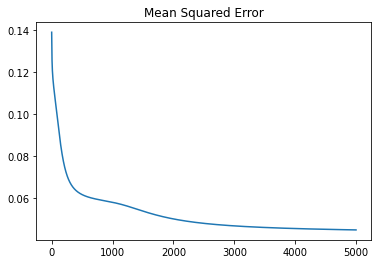

In [ ]:
results.mse.plot(title="Mean Squared Error")

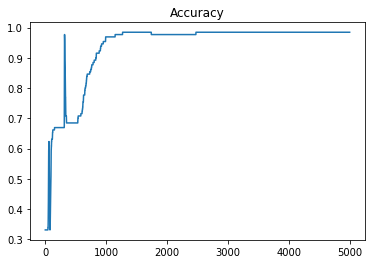

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95
